In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/chentingkao/PracticeData/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# replace '?' with na value
df_replaced = df.replace('?', np.nan)

# fill na value with mode value for each column
# mode() returns a Series. We need to get the first value for the real value.
for column_name in df_replaced.columns:
  df_replaced[column_name] = df_replaced[column_name].fillna(df_replaced[column_name].mode()[0])

df_replaced.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
# Check if the labels is balanced
# normalize = True calculates the proportion of each unique value relative to
# the total number of values in the Series.
income = df_replaced['income'].value_counts(normalize = True)
print(income)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/599405538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = income.index, y = income.values, palette = 'bright')


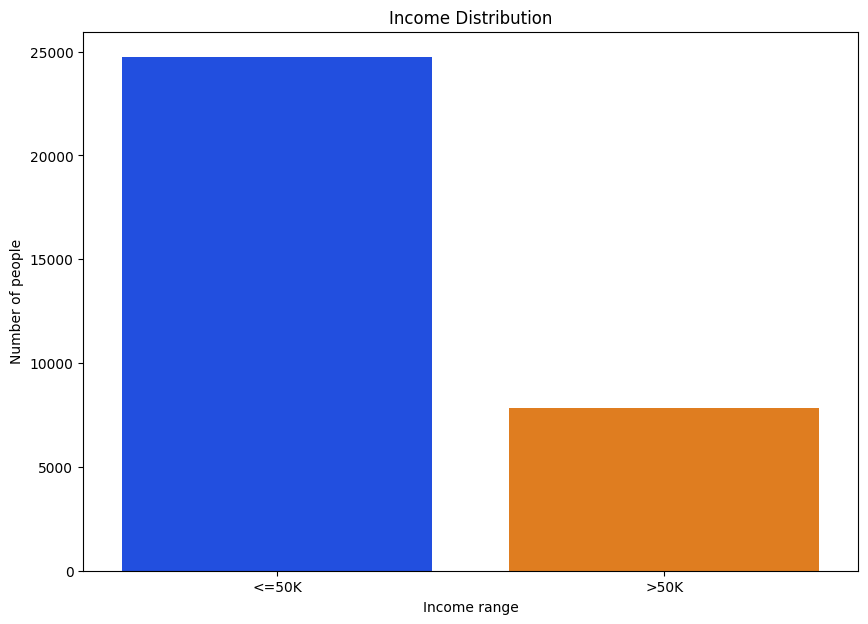

In [20]:
# Create a barchart to visualize the label
import matplotlib.pyplot as plt
import seaborn as sns

income = df_replaced['income'].value_counts()
plt.figure(figsize = (10, 7))
# Use income.index in Series to get the name of unique value
# palette 調色盤
sns.barplot(x = income.index, y = income.values, palette = 'bright')

plt.xlabel('Income range')
plt.ylabel('Number of people')
plt.title('Income Distribution')

# 座標軸的字體大小
plt.tick_params(labelsize = 10)
plt.show()

/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/3069483579.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_replaced['age'], bins = 20)


Text(0.5, 0, 'Age')

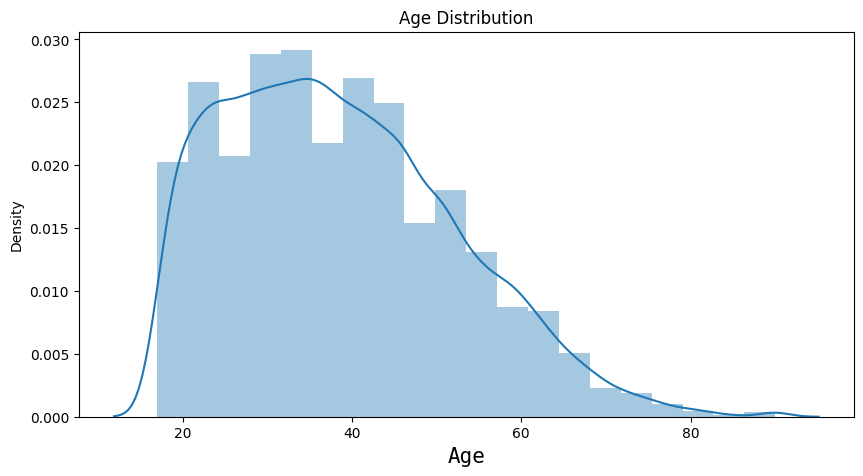

In [29]:
# the smallest age is 17. the largest age is 90
df_replaced['age'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
sns.distplot(df_replaced['age'], bins = 20)

plt.title('Age Distribution')
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/2667780164.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = education.values, y = education.index, palette = rainbow_palette)


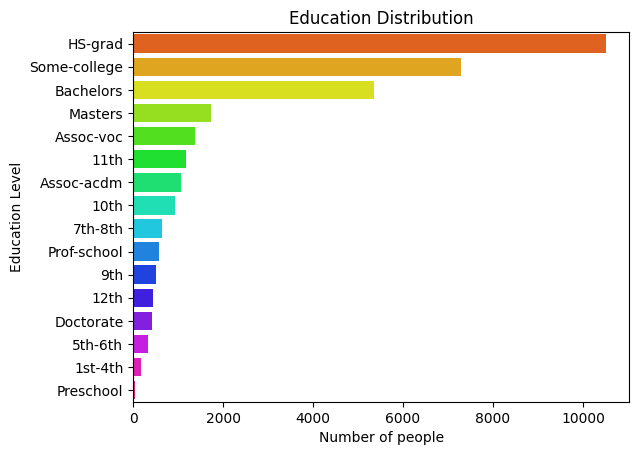

In [34]:
# Create and display a barplot for 'Education' using Seaborn, where the x-axis represents the count of people with each education level (edu.values), and the y-axis represents the different education categories (edu.index).
education = df_replaced['education'].value_counts()


rainbow_palette = sns.color_palette("hsv", len(education.index))

sns.barplot(x = education.values, y = education.index, palette = rainbow_palette)
plt.xlabel('Number of people')
plt.ylabel('Education Level')
plt.title('Education Distribution')
plt.show()


/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_59236/1286554194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = education_years.index, y = education_years.values, palette = 'bright')


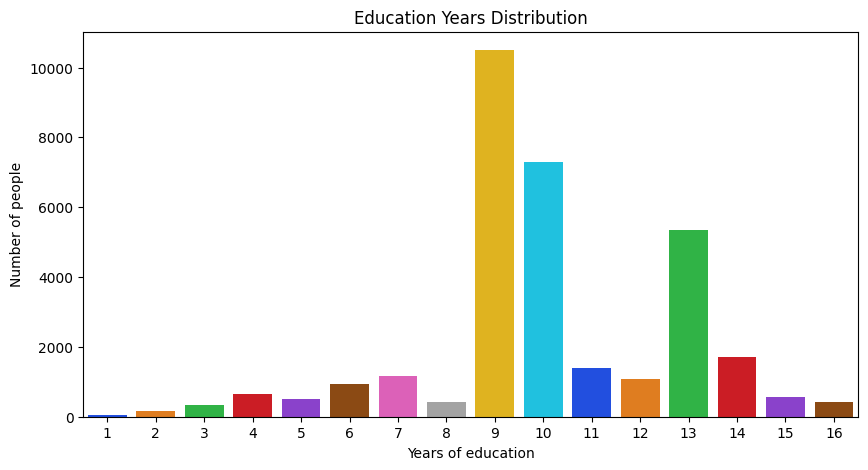

In [37]:
# Create and display a barplot for 'Years of Education' using the Seaborn library to visualize the distribution of years of education where, x = edu_num.index represents the unique education levels, and y = edu_num.values represents the corresponding counts.

education_years = df_replaced['education.num'].value_counts()

plt.figure(figsize = (10, 5))
sns.barplot(x = education_years.index, y = education_years.values, palette = 'bright')

plt.xlabel('Years of education')
plt.ylabel('Number of people')
plt.title('Education Years Distribution')
plt.show()

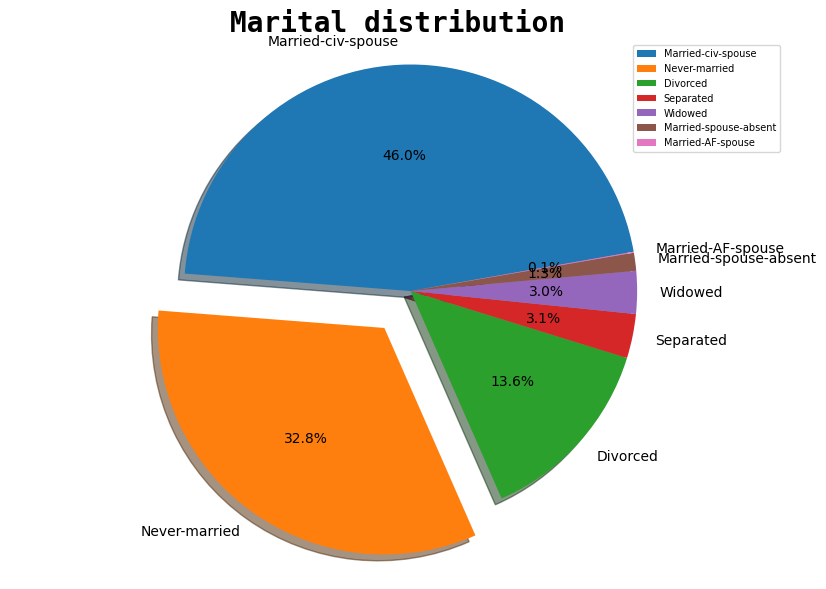

In [40]:
# Creating a pie chart for 'Marital status'
mariage = df_replaced['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# the length of explode should match the length of columns
plt.pie(mariage.values, labels=mariage.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()
